In [312]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

In [62]:
subs = """title = re.sub(re.escape('[O][O] + 2 [Pt] <=> 2 O=[Pt]'), 'R1', title)
title = re.sub(re.escape('[H][H] + 2 [Pt] <=> 2 [Pt]'), 'R2', title)
title = re.sub(re.escape('[Pt] + O=[Pt] <=> O[Pt] + [Pt]'), 'R3', title)
title = re.sub(re.escape('C + 2 [Pt] <=> C[Pt] + [Pt]'), 'R4', title)
title = re.sub(re.escape('C + O=[Pt] + [Pt] <=> C[Pt] + O[Pt]'), 'R5', title)
title = re.sub(re.escape('C=[Pt] + [Pt] <=> C[Pt] + [Pt]'), 'R6', title)
title = re.sub(re.escape('C#[Pt] + [Pt] <=> C=[Pt] + [Pt]'), 'R7', title)
title = re.sub(re.escape('C#[Pt] + [Pt] <=> C~[Pt] + [Pt]'), 'R8', title)
title = re.sub(re.escape('C~[Pt] + [H][H] <=> C=[Pt]'), 'R9', title)
title = re.sub(re.escape('[C-]#[O+] + [Pt] <=> O=C=[Pt]'), 'R10', title)
title = re.sub(re.escape('C~[Pt] + O=[Pt] <=> O=C=[Pt] + [Pt]'), 'R11', title)
title = re.sub(re.escape('C + O[Pt] + [Pt] <=> C[Pt] + O.[Pt]'), 'R12', title)
title = re.sub(re.escape('O + [Pt] <=> O.[Pt]'), 'R13', title)
title = re.sub(re.escape('O.[Pt] + O=[Pt] <=> 2 O[Pt]'), 'R14', title)
title = re.sub(re.escape('O[Pt] + [Pt] <=> O.[Pt] + [Pt]'), 'R15', title)
title = re.sub(re.escape('[Pt] + O[Pt] <=> O.[Pt] + [Pt]'), 'R15', title)
title = re.sub(re.escape('O=C=O + [Pt] <=> O=C=O.[Pt]'), 'R16', title)
title = re.sub(re.escape('O=C=[Pt] + O=[Pt] <=> O=C=O.[Pt] + [Pt]'), 'R17', title)
title = re.sub(re.escape('O=C=O.[Pt] + [Pt] <=> O[Pt] + O=C=[Pt]'), 'R18', title)
title = re.sub(re.escape('O=C=O.[Pt] + [Pt] <=> O=C=[Pt] + O[Pt]'), 'R18', title)
title = re.sub(re.escape('C + [Pt] <=> C.[Pt]'), 'R19', title)
title = re.sub(re.escape('[H][H] + [Pt] <=> [H][H].[Pt]'), 'R20', title)
title = re.sub(re.escape('[H] + [Pt] <=> [Pt]'), 'R21', title)
title = re.sub(re.escape('[OH] + [Pt] <=> O[Pt]'), 'R22', title)
title = re.sub(re.escape('[CH3] + [Pt] <=> C[Pt]'), 'R23', title)
title = re.sub(re.escape('[CH]=O + [Pt] <=> O=C[Pt]'), 'R24', title)
title = re.sub(re.escape('O + 2 [Pt] <=> O[Pt] + [Pt]'), 'R25', title)
title = re.sub(re.escape('O + 2 [Pt] <=> [Pt] + O[Pt]'), 'R25', title)
title = re.sub(re.escape('CC + 2 [Pt] <=> 2 C[Pt]'), 'R26', title)
title = re.sub(re.escape('CO + 2 [Pt] <=> C[Pt] + O[Pt]'), 'R27', title)
title = re.sub(re.escape('C=O + 2 [Pt] <=> O=C[Pt] + [Pt]'), 'R28', title)
title = re.sub(re.escape('CC=O + 2 [Pt] <=> C[Pt] + O=C[Pt]'), 'R29', title)
title = re.sub(re.escape('[CH]C + 2 [Pt] <=> C[Pt] + C#[Pt]'), 'R30', title)
title = re.sub(re.escape('C=[Pt] + O[Pt] <=> C[Pt] + O=[Pt]'), 'R31', title)
title = re.sub(re.escape('C#[Pt] + O[Pt] <=> C=[Pt] + O=[Pt]'), 'R32', title)
title = re.sub(re.escape('2 C=[Pt] <=> C[Pt] + C#[Pt]'), 'R33', title)
title = re.sub(re.escape('C~[Pt] + O[Pt] <=> C#[Pt] + O=[Pt]'), 'R34', title)
title = re.sub(re.escape('C[Pt] + C~[Pt] <=> C=[Pt] + C#[Pt]'), 'R35', title)
title = re.sub(re.escape('C=[Pt] + C~[Pt] <=> 2 C#[Pt]'), 'R36', title)
title = re.sub(re.escape('O=C[Pt] + O=[Pt] <=> O[Pt] + O=C=[Pt]'), 'R37', title)
title = re.sub(re.escape('O=C[Pt] + O=[Pt] <=> O=C=[Pt] + O[Pt]'), 'R37', title)
title = re.sub(re.escape('C=[Pt] + O=C[Pt] <=> C[Pt] + O=C=[Pt]'), 'R38', title)
title = re.sub(re.escape('O=C[Pt] + C#[Pt] <=> C=[Pt] + O=C=[Pt]'), 'R39', title)
title = re.sub(re.escape('O=C[Pt] + C~[Pt] <=> C#[Pt] + O=C=[Pt]'), 'R40', title)
title = re.sub(re.escape('O=C[Pt] + [Pt] <=> [Pt] + O=C=[Pt]'), 'R41', title)
title = re.sub(re.escape('O=C[Pt] + [Pt] <=> O=C=[Pt] + [Pt]'), 'R41', title)
title = re.sub(re.escape('[C-]#[O+] + [Pt] <=> [C-]#[O+].[Pt]'), 'R', title)"""
translation = {}
for l in subs.split("\n"):
    reaction, label = l.lstrip("""title = re.sub(re.escape('""").strip(""", title)""").split("'), ")
    label = label.strip("'").lstrip("'")
    translation[reaction] = label

In [195]:
def import_sensitivities(ratio):
    """
    Ratio is the C/O starting gas ratio
    file_location is the LSR C and O binding energy, fasle to load the base case
    thermo is either False to load reaction sensitivities or True to load thermo sensitivities
    """
    data = pd.read_csv('./sensitivities/' + str(ratio) + 'RxnSensitivity.csv')
    data = data.values
    data = data.tolist()
    return data

In [196]:
ratios = [0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6]
sens_types = ['SynGas Selectivity', 'SynGas Yield', 'CO Selectivity', 'CO Yield',
              'H2 Selectivity', 'H2 Yield', 'CH4 Conversion', 'CO2+H2O Selectivity',
              'CO2+H2O Yield', 'Exit Temperature', 'Maximum Temperature',
              'Dist to Max Temperature', 'O2 Conversion']
sens_dict = {}
for s in range(len(sens_types)):
    sens_dict[sens_types[s]] = s

sens_index = list(range(len(sens_types)))
ratios_index = list(range(len(ratios)))
sens_index_dict = dict(zip(sens_types, sens_index))
rev_sens_index_dict = dict(zip(sens_index, sens_types))
ratios_index_dict = dict(zip(ratios, ratios_index))
rev_ratios_index_dict = dict(zip(ratios_index, ratios))

In [198]:
sens_data = []
for r in ratios:
    sens_data.append(import_sensitivities(r))
sens_data

[[[0,
   '[H][H] + 2 [Pt] <=> 2 [Pt]',
   9.516222277420446e-05,
   0.00010622596699466137,
   8.785076399357769e-05,
   9.891450740771762e-05,
   0.00010442921194189524,
   0.0001154929571999655,
   1.1063733697025534e-05,
   -0.0001269409122358213,
   -0.00011587719257788138,
   -2.6012996780413425e-05,
   -2.845424768213099e-05,
   0.0,
   7.061018480089435e-12],
  [1,
   'O=C=O + [Pt] <=> O=C=O.[Pt]',
   -0.00011429520280413314,
   -0.00012800694498152674,
   -9.56669179176825e-05,
   -0.00010937866265216049,
   -0.00013790582825589558,
   -0.0001516175671923041,
   -1.3711757851821355e-05,
   0.00014183972226921066,
   0.00012812794497480822,
   3.1300858977913926e-05,
   -6.1408761747794e-05,
   0.0,
   -8.992806554830884e-12],
  [2,
   '[C-]#[O+] + [Pt] <=> O=C=[Pt]',
   -0.0007318137290055082,
   -0.0008135076576393673,
   -0.0005996687167453007,
   -0.0006813627533441098,
   -0.0008993023842934687,
   -0.0009809961761016175,
   -8.169452648625606e-05,
   0.0011766464495213686,

In [66]:
reactions = set()  # create list of unique reactions
for r in range(len(sens_data[0])):  # for each reaction
    reactions.add(sens_data[0][r][1])  # append the reaction itself
reactions = list(sens_data)

In [79]:
def calculate(data):
    ratio = data[1]
    ch4_in = data[2]
    ch4_out = data[3]
    co_out = data[4]
    h2_out = data[5]
    h2o_out = data[6]
    co2_out = data[7]
    exit_T = data[8]
    max_T = data[9]
    dist_Tmax = data[10]
    o2_conv = data[11]

    ch4_depletion = ch4_in - ch4_out
    ch4_conv = ch4_depletion / ch4_in
    h2_sel = h2_out / (ch4_depletion * 2)
    h2_yield = h2_out / ( ch4_in * 2)
    co_sel = co_out / ch4_depletion
    co_yield = co_out / ch4_in
    syngas_sel = co_sel + h2_sel
    syngas_yield = syngas_sel * ch4_conv
    co2_sel = co2_out / ch4_depletion
    h2o_sel = h2o_out / (2 * ch4_depletion)
    fullox_sel = h2o_sel + co2_sel
    fullox_yield = fullox_sel * ch4_conv

    return syngas_sel, syngas_yield, co_sel, co_yield, h2_sel, h2_yield, ch4_conv, fullox_sel, fullox_yield, exit_T, max_T, dist_Tmax, o2_conv


def get_sens_data(sens_data, s):
    ratios = [0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6]
    data = []
    for ratio in range(len(ratios)):
        tmp = []
        for rxn in range(len(sens_data[0])):
            try:
                tmp.append([translation[sens_data[ratio][rxn][1]], abs(sens_data[ratio][rxn][s+2])])
            except:
                tmp.append([sens_data[ratio][rxn][1], abs(sens_data[ratio][rxn][s+2])])
        tmp = sorted(tmp, key=lambda l:l[1], reverse=True)
#         tmp = sorted(tmp, key=itemgetter(1))
#         print(ratios[ratio])
#         for x in range(5):
#             print(tmp[x])
    return tmp


def import_data(ratio):
    data = pd.read_csv('./data.csv')
    data = data.values
    
    for x in range(len(data)):
        r = round(data[x][1],1)
        if r == ratio:
            return calculate(data[x])

In [68]:
get_sens_data(sens_data, 1)

0.6
['R23', 0.008755799904988124]
['R30', 0.00736532537874555]
['R1', 0.007233157165456061]
['R5', 0.004739106849258758]
['R19', 0.00335060494767699]
0.7
['R1', 0.02968143333898068]
['R5', 0.026344651488880617]
['R23', 0.01879277102151521]
['R22', 0.013181025789734714]
['R', 0.013161612559099643]
0.8
['R5', 0.057867652400458165]
['R1', 0.022135567251298883]
['R34', 0.01852675614367441]
['R29', 0.011993861474161429]
['R26', 0.01001824911563725]
0.9
['R5', 0.06714763749861978]
['R22', 0.0397464084203592]
['R19', 0.02884136812018947]
['R18', 0.028633119151409262]
['R33', 0.028586838625147163]
1.0
['R5', 0.07991439712194504]
['R', 0.02500803114107453]
['R1', 0.016713490085843725]
['R12', 0.015564718842132312]
['R19', 0.015531417013153496]
1.1
['R5', 0.09109171556937486]
['R22', 0.026873815831267748]
['R41', 0.026552702098002656]
['R28', 0.019470723611381958]
['R10', 0.019466227306038943]
1.2
['R36', 0.15181847665342227]
['R35', 0.15111944520651785]
['R5', 0.1081150015573108]
['R25', 0.0355

In [69]:
ratios = [0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6]
sens_types = ['SynGas Selectivity', 'SynGas Yield', 'CO Selectivity', 'CO Yield',
              'H2 Selectivity', 'H2 Yield', 'CH4 Conversion', 'CO2+H2O Selectivity',
              'CO2+H2O Yield', 'Exit Temperature', 'Maximum Temperature',
              'Dist to Max Temperature', 'O2 Conversion']
data = []

sens = 1
for rxn in range(len(sens_data[0])):
    tmp = 0.
    for ratio in range(len(ratios)):
        tmp += abs(sens_data[ratio][rxn][sens_dict['SynGas Yield'] + 2])
    try:
        data.append([translation[sens_data[ratio][rxn][1]], tmp])
    except:
        data.append([sens_data[ratio][rxn][1], tmp])
        


In [70]:
data = sorted(data, key=lambda l:l[1], reverse=True)

In [71]:
data

[['R5', 1.6586644720902677],
 ['R39', 0.8639007945245017],
 ['R36', 0.8266378191183338],
 ['R35', 0.5162087701311805],
 ['R1', 0.5008981430524067],
 ['R28', 0.497599384737091],
 ['R40', 0.46199819036416256],
 ['R6', 0.4564209641009526],
 ['R37', 0.45632499743091226],
 ['R30', 0.4551790105998911],
 ['R22', 0.45243792721647647],
 ['R8', 0.44573154732951775],
 ['R34', 0.43925956178635905],
 ['R31', 0.42838780917650016],
 ['R2', 0.4282634076072964],
 ['R38', 0.417858886091785],
 ['R32', 0.41665396601451965],
 ['R', 0.4127763507986524],
 ['R33', 0.4019187810321189],
 ['R21', 0.3981608278652684],
 ['R19', 0.39399008027844357],
 ['R41', 0.382085069518741],
 ['R25', 0.3746757420926682],
 ['R26', 0.36973507701159103],
 ['R16', 0.3559759945565145],
 ['R27', 0.3467565689332878],
 ['R10', 0.34235220497582364],
 ['R11', 0.33866296354802616],
 ['R24', 0.3367514243833139],
 ['R23', 0.3219760270588675],
 ['R9', 0.31825289080397096],
 ['R20', 0.3153770660109612],
 ['R14', 0.3148139306439077],
 ['R3', 0

In [111]:
test = import_sensitivities(1.0)
test

[[0,
  '[H][H] + 2 [Pt] <=> 2 [Pt]',
  -0.003551148557610148,
  -0.012312034715385441,
  -0.0012578768093766516,
  -0.010018963885224223,
  -0.006013658710899505,
  -0.014774329123304187,
  -0.008761197280902834,
  0.030354319561454218,
  0.0215904628787312,
  0.008089521578328748,
  -0.0004733657971043847,
  0.0,
  0.0],
 [1,
  'O=C=O + [Pt] <=> O=C=O.[Pt]',
  -0.0018834650933921507,
  0.009080221576466352,
  -0.002371329195920065,
  0.008592303985033278,
  -0.0013595976943968652,
  0.009604146411717245,
  0.010963893170963458,
  -0.008465286217179013,
  0.0024976788288509637,
  0.0011257745676148743,
  0.0012300940573521815,
  0.0,
  0.0],
 [2,
  '[C-]#[O+] + [Pt] <=> O=C=[Pt]',
  0.005884420517926467,
  -0.002042564914420105,
  0.003450314179208485,
  -0.004476478313247226,
  0.008498158544363048,
  0.0005709659335689709,
  -0.007926519002630241,
  -0.017746039546769742,
  -0.025671151906203026,
  -0.01050563087992885,
  -0.005119565790693299,
  0.0,
  1.110223024625169e-14],
 [3,
 

In [82]:
test0 = import_data(1.0)
test0

(1.7754144731866055,
 1.3110407799255857,
 0.9192970277148407,
 0.6788476214431879,
 0.8561174454717649,
 0.632193158482398,
 0.7384420932270885,
 0.21752836312016294,
 0.16063209979871532,
 1353.2278108676871,
 1791.0875324883084,
 11.36,
 0.9999999999999888)

In [83]:
original_values_dict = {}

for v in range(len(test0)):
    original_values_dict[sens_types[v]] = test0[v]
    
original_values_dict

{'SynGas Selectivity': 1.7754144731866055,
 'SynGas Yield': 1.3110407799255857,
 'CO Selectivity': 0.9192970277148407,
 'CO Yield': 0.6788476214431879,
 'H2 Selectivity': 0.8561174454717649,
 'H2 Yield': 0.632193158482398,
 'CH4 Conversion': 0.7384420932270885,
 'CO2+H2O Selectivity': 0.21752836312016294,
 'CO2+H2O Yield': 0.16063209979871532,
 'Exit Temperature': 1353.2278108676871,
 'Maximum Temperature': 1791.0875324883084,
 'Dist to Max Temperature': 11.36,
 'O2 Conversion': 0.9999999999999888}

In [172]:
sens_types = ['SynGas Selectivity', 'SynGas Yield', 'CO Selectivity', 'CO Yield',
              'H2 Selectivity', 'H2 Yield', 'CH4 Conversion', 'CO2+H2O Selectivity',
              'CO2+H2O Yield', 'Exit Temperature', 'Maximum Temperature',
              'Dist to Max Temperature', 'O2 Conversion']
def sensTable(test, sens):
    t = []
    for x in range(len(test)):
#         try:
        t.append([translation[test[x][1]], test[x][1], test[x][sens_dict[sens] + 2]])
#         except:
#             t.append([test[x][1], test[x][1], test[x][3]])

    t = sorted(t, key=lambda l:l[2], reverse=True)
    return t


def normalizedSensTable(test, sens):
    t = sensTable(test, sens)
    t_normal = []
    dk = 1e-2
    for x in t:
        new_x = x[2] * original_values_dict[sens] * 1e-2 + original_values_dict[sens]
#         print('New X: {}'.format(new_x))
        normalized = (np.log(original_values_dict[sens]) - np.log(new_x))/(np.log(1)-np.log(1 + dk))
        t_normal.append([x[0], x[1], normalized])
    t_normal = sorted(t_normal, key=lambda l:l[2], reverse=True)
    return t_normal




In [150]:
dk = 1e-2
print(original_values_dict['CH4 Conversion'])
top = np.log(original_values_dict['CH4 Conversion']) - np.log(0.7391503239780634)
bottom = (np.log(1)-np.log(1 + dk))
print(top, bottom)
normalized = top/bottom
normalized

0.7384420932270885
-0.000958628099284875 -0.009950330853168092


0.09634132909054545

In [151]:
def sensTables(test, sens_type):
    print(sens_type)
    t = sensTable(test, sens_type)
    for x in t:
        print("{}\t&{}\t&{:.3e}\\".format(x[0], x[1], x[2]))
    tn = normalizedSensTable(test, sens_type)
    print('{} Normalized'.format(sens_type))
    for x in tn:
        print("{}\t&{}\t&{:.3e}\\".format(x[0], x[1], x[2]))


sensTables(test, 'CH4 Conversion')

CH4 Conversion
R5	&C + O=[Pt] + [Pt] <=> C[Pt] + O[Pt]	&4.537e-02\
R21	&[H] + [Pt] <=> [Pt]	&1.177e-02\
R25	&O + 2 [Pt] <=> [Pt] + O[Pt]	&1.096e-02\
R16	&O=C=O + [Pt] <=> O=C=O.[Pt]	&1.096e-02\
R18	&O=C=O.[Pt] + [Pt] <=> O=C=[Pt] + O[Pt]	&1.078e-02\
R38	&C=[Pt] + O=C[Pt] <=> C[Pt] + O=C=[Pt]	&1.078e-02\
R7	&C#[Pt] + [Pt] <=> C=[Pt] + [Pt]	&1.078e-02\
R40	&O=C[Pt] + C~[Pt] <=> C#[Pt] + O=C=[Pt]	&1.078e-02\
R29	&CC=O + 2 [Pt] <=> C[Pt] + O=C[Pt]	&1.078e-02\
R9	&C~[Pt] + [H][H] <=> C=[Pt]	&1.078e-02\
R33	&2 C=[Pt] <=> C[Pt] + C#[Pt]	&1.078e-02\
R15	&[Pt] + O[Pt] <=> O.[Pt] + [Pt]	&8.723e-03\
R4	&C + 2 [Pt] <=> C[Pt] + [Pt]	&2.632e-03\
R34	&C~[Pt] + O[Pt] <=> C#[Pt] + O=[Pt]	&1.980e-03\
R22	&[OH] + [Pt] <=> O[Pt]	&9.863e-06\
R3	&[Pt] + O=[Pt] <=> O[Pt] + [Pt]	&3.047e-07\
R24	&[CH]=O + [Pt] <=> O=C[Pt]	&4.826e-08\
R28	&C=O + 2 [Pt] <=> O=C[Pt] + [Pt]	&1.375e-08\
R36	&C=[Pt] + C~[Pt] <=> 2 C#[Pt]	&6.569e-09\
R39	&O=C[Pt] + C#[Pt] <=> C=[Pt] + O=C=[Pt]	&4.172e-09\
R41	&O=C[Pt] + [Pt] <=> O=C=

In [152]:
sensTables(test, 'SynGas Yield')

SynGas Yield
R5	&C + O=[Pt] + [Pt] <=> C[Pt] + O[Pt]	&7.991e-02\
R21	&[H] + [Pt] <=> [Pt]	&1.029e-02\
R16	&O=C=O + [Pt] <=> O=C=O.[Pt]	&9.080e-03\
R18	&O=C=O.[Pt] + [Pt] <=> O=C=[Pt] + O[Pt]	&8.987e-03\
R38	&C=[Pt] + O=C[Pt] <=> C[Pt] + O=C=[Pt]	&8.987e-03\
R40	&O=C[Pt] + C~[Pt] <=> C#[Pt] + O=C=[Pt]	&8.987e-03\
R7	&C#[Pt] + [Pt] <=> C=[Pt] + [Pt]	&8.987e-03\
R9	&C~[Pt] + [H][H] <=> C=[Pt]	&8.987e-03\
R29	&CC=O + 2 [Pt] <=> C[Pt] + O=C[Pt]	&8.987e-03\
R33	&2 C=[Pt] <=> C[Pt] + C#[Pt]	&8.987e-03\
R25	&O + 2 [Pt] <=> [Pt] + O[Pt]	&8.738e-03\
R15	&[Pt] + O[Pt] <=> O.[Pt] + [Pt]	&6.171e-03\
R4	&C + 2 [Pt] <=> C[Pt] + [Pt]	&4.204e-03\
R23	&[CH3] + [Pt] <=> C[Pt]	&4.191e-03\
R26	&CC + 2 [Pt] <=> 2 C[Pt]	&1.665e-05\
R27	&CO + 2 [Pt] <=> C[Pt] + O[Pt]	&3.955e-07\
R3	&[Pt] + O=[Pt] <=> O[Pt] + [Pt]	&2.241e-07\
R24	&[CH]=O + [Pt] <=> O=C[Pt]	&6.476e-08\
R28	&C=O + 2 [Pt] <=> O=C[Pt] + [Pt]	&1.345e-08\
R36	&C=[Pt] + C~[Pt] <=> 2 C#[Pt]	&8.397e-09\
R39	&O=C[Pt] + C#[Pt] <=> C=[Pt] + O=C=[Pt]	&5.02

In [153]:
sensTables(test, 'O2 Conversion')

O2 Conversion
R5	&C + O=[Pt] + [Pt] <=> C[Pt] + O[Pt]	&4.441e-14\
R10	&[C-]#[O+] + [Pt] <=> O=C=[Pt]	&1.110e-14\
R17	&O=C=[Pt] + O=[Pt] <=> O=C=O.[Pt] + [Pt]	&1.110e-14\
R4	&C + 2 [Pt] <=> C[Pt] + [Pt]	&1.110e-14\
R6	&C=[Pt] + [Pt] <=> C[Pt] + [Pt]	&1.110e-14\
R8	&C#[Pt] + [Pt] <=> C~[Pt] + [Pt]	&1.110e-14\
R31	&C=[Pt] + O[Pt] <=> C[Pt] + O=[Pt]	&1.110e-14\
R35	&C[Pt] + C~[Pt] <=> C=[Pt] + C#[Pt]	&1.110e-14\
R30	&[CH]C + 2 [Pt] <=> C[Pt] + C#[Pt]	&1.110e-14\
R2	&[H][H] + 2 [Pt] <=> 2 [Pt]	&0.000e+00\
R16	&O=C=O + [Pt] <=> O=C=O.[Pt]	&0.000e+00\
R1	&[O][O] + 2 [Pt] <=> 2 O=[Pt]	&0.000e+00\
R7	&C#[Pt] + [Pt] <=> C=[Pt] + [Pt]	&0.000e+00\
R11	&C~[Pt] + O=[Pt] <=> O=C=[Pt] + [Pt]	&0.000e+00\
R9	&C~[Pt] + [H][H] <=> C=[Pt]	&0.000e+00\
R18	&O=C=O.[Pt] + [Pt] <=> O=C=[Pt] + O[Pt]	&0.000e+00\
R3	&[Pt] + O=[Pt] <=> O[Pt] + [Pt]	&0.000e+00\
R13	&O + [Pt] <=> O.[Pt]	&0.000e+00\
R14	&O.[Pt] + O=[Pt] <=> 2 O[Pt]	&0.000e+00\
R15	&[Pt] + O[Pt] <=> O.[Pt] + [Pt]	&0.000e+00\
R21	&[H] + [Pt] <=> [Pt]	&0

In [158]:
sens_types = ['SynGas Selectivity', 'SynGas Yield', 'CO Selectivity', 'CO Yield',
              'H2 Selectivity', 'H2 Yield', 'CH4 Conversion', 'CO2+H2O Selectivity',
              'CO2+H2O Yield', 'Exit Temperature', 'Maximum Temperature',
              'Dist to Max Temperature', 'O2 Conversion']
sensTables(test, 'SynGas Selectivity')

SynGas Selectivity
R5	&C + O=[Pt] + [Pt] <=> C[Pt] + O[Pt]	&3.453e-02\
R23	&[CH3] + [Pt] <=> C[Pt]	&7.340e-03\
R10	&[C-]#[O+] + [Pt] <=> O=C=[Pt]	&5.884e-03\
R31	&C=[Pt] + O[Pt] <=> C[Pt] + O=[Pt]	&5.879e-03\
R30	&[CH]C + 2 [Pt] <=> C[Pt] + C#[Pt]	&5.690e-03\
R6	&C=[Pt] + [Pt] <=> C[Pt] + [Pt]	&5.604e-03\
R35	&C[Pt] + C~[Pt] <=> C=[Pt] + C#[Pt]	&5.598e-03\
R8	&C#[Pt] + [Pt] <=> C~[Pt] + [Pt]	&5.598e-03\
R17	&O=C=[Pt] + O=[Pt] <=> O=C=O.[Pt] + [Pt]	&2.222e-03\
R19	&C + [Pt] <=> C.[Pt]	&1.791e-03\
R4	&C + 2 [Pt] <=> C[Pt] + [Pt]	&1.572e-03\
R26	&CC + 2 [Pt] <=> 2 C[Pt]	&3.790e-05\
R27	&CO + 2 [Pt] <=> C[Pt] + O[Pt]	&1.041e-06\
R24	&[CH]=O + [Pt] <=> O=C[Pt]	&1.650e-08\
R36	&C=[Pt] + C~[Pt] <=> 2 C#[Pt]	&1.827e-09\
R39	&O=C[Pt] + C#[Pt] <=> C=[Pt] + O=C=[Pt]	&8.561e-10\
R28	&C=O + 2 [Pt] <=> O=C[Pt] + [Pt]	&-2.965e-10\
R41	&O=C[Pt] + [Pt] <=> O=C=[Pt] + [Pt]	&-1.403e-09\
R20	&[H][H] + [Pt] <=> [H][H].[Pt]	&-3.597e-09\
R3	&[Pt] + O=[Pt] <=> O[Pt] + [Pt]	&-8.056e-08\
R13	&O + [Pt] <=> O.[Pt

In [202]:
normalized_sens_data = []

for r in sens_data:
    ratio_data = []
    for rxn in r:
        rxn_data = []
        rxn_data.append(translation[rxn[1]])
        rxn_data.append(rxn[1])
        for s in range(2,15):
            new_x = rxn[s] * original_values_dict[rev_sens_index_dict[s-2]] * 1e-2 + original_values_dict[rev_sens_index_dict[s-2]]
            rxn_data.append((np.log(original_values_dict[rev_sens_index_dict[s-2]]) - np.log(new_x))/(np.log(1)-np.log(1 + dk)))
        ratio_data.append(rxn_data)
    normalized_sens_data.append(ratio_data)
        

In [303]:
[row[0] for row in normalized_sens_data]

[['R2',
  '[H][H] + 2 [Pt] <=> 2 [Pt]',
  9.563719930309065e-05,
  0.00010675615931964682,
  8.828925057768952e-05,
  9.940821058587745e-05,
  0.0001049504372783044,
  0.00011606939729486057,
  1.1118960005398514e-05,
  -0.00012757464518456046,
  -0.00011645568517358314,
  -2.614284941212041e-05,
  -2.8596287072942104e-05,
  -0.0,
  7.10742262867609e-12],
 ['R2',
  '[H][H] + 2 [Pt] <=> 2 [Pt]',
  -0.0026360871827094522,
  -0.0008331203891133062,
  -0.0011594774897133392,
  0.0006434893038855964,
  -0.004316243829673919,
  -0.0025132770360694044,
  0.0018029667936128827,
  0.009871906902155529,
  0.011674873695729358,
  0.0056399458420391575,
  0.001220409623962844,
  -0.0,
  -3.21340300951149e-12],
 ['R2',
  '[H][H] + 2 [Pt] <=> 2 [Pt]',
  -0.000709777457816335,
  -0.002881478337626838,
  -8.14609596184473e-05,
  -0.002253161839440108,
  -0.0013998754301772112,
  -0.003571576309998872,
  -0.002171700879816082,
  0.006823783554389061,
  0.0046520826745562426,
  0.0019868210756029563,
  

In [284]:
normalized_sens_data[0]

[['R2',
  '[H][H] + 2 [Pt] <=> 2 [Pt]',
  9.563719930309065e-05,
  0.00010675615931964682,
  8.828925057768952e-05,
  9.940821058587745e-05,
  0.0001049504372783044,
  0.00011606939729486057,
  1.1118960005398514e-05,
  -0.00012757464518456046,
  -0.00011645568517358314,
  -2.614284941212041e-05,
  -2.8596287072942104e-05,
  -0.0,
  7.10742262867609e-12],
 ['R16',
  'O=C=O + [Pt] <=> O=C=O.[Pt]',
  -0.00011486579674009802,
  -0.0001286460006266224,
  -9.614450522785991e-05,
  -0.00010992470912554194,
  -0.00013859430944978946,
  -0.00015237451335026092,
  -1.3780203886524378e-05,
  0.00014254764367677364,
  0.00012876743976235512,
  3.1457098812406507e-05,
  -6.171531534427804e-05,
  -0.0,
  -9.037695964251327e-12],
 ['R10',
  '[C-]#[O+] + [Pt] <=> O=C=[Pt]',
  -0.0007354694206381832,
  -0.0008175717758878467,
  -0.0006026638949101661,
  -0.0006847662501709872,
  -0.0009037955032009271,
  -0.0009858978584589588,
  -8.210235524966349e-05,
  0.00118251296812512,
  0.0011004106128810352,


In [466]:
sum_list = [0]
# abs_list = []
for rxn in normalized_sens_data[0]:
    tmp = [rxn[0], rxn[1]]
    tmp.extend([0]*13)
    sum_list.append(tmp)

    
def totalSensWidths(data, sens, ABS=False):
    m = []
    for r in range(len(data[0])):  # for each reaction
        d = [row[r] for row in data]  # list of one reaction's sens at different ratios
        n = 0.
        b = []
        for ratio in d:
            if ABS is not False:
                n += abs(ratio[sens_index_dict[sens] + 2])
            else:
                n += ratio[sens_index_dict[sens] + 2]
            b.append(ratio[sens_index_dict[sens] + 2])
        if d[0][0] == 'R':
            continue
        m.append([d[0][0], d[0][1], n, b])
    m = sorted(m, key=lambda l:l[2], reverse=False)
    return m


sens_types = ['SynGas Selectivity', 'SynGas Yield', 'CO Selectivity', 'CO Yield',
              'H2 Selectivity', 'H2 Yield', 'CH4 Conversion', 'CO2+H2O Selectivity',
              'CO2+H2O Yield', 'Exit Temperature', 'Maximum Temperature',
              'Dist to Max Temperature', 'O2 Conversion']

p = totalSensWidths(normalized_sens_data, 'SynGas Selectivity', ABS=True)

In [579]:
def allPlot(data, sens):
    fig = plt.figure()
    cmap = plt.get_cmap("Spectral", 15)
#     matplotlib.cm.ScalarMappable(cmap="Spectral_r")
#     sns.set_palette(sns.color_palette("hls", 15))
#     sns.set_palette(sns.cubehelix_palette(8, start=.5, rot=-.75))
#     sns.set_palette(sns.color_palette("cubehelix", 15))
    # putting the reactions in order by longest bar
    p = totalSensWidths(data, sens, ABS=True)
    ticks = [row[0] for row in p]
    widths = [row[3] for row in p]
    y = list(range(len(p)))
    
    x_left_tot = [0] * (len(p))
    x_right_tot = [0] * (len(p))

    for r in range(len(data)):  # for each ratio
        d = [row[r] for row in widths]
        x_left = []
        x_right = []
        for x in d:
            if x >= 0:
                x_right.append(x)
                x_left.append(0)
            elif x <= 0:
                x_left.append(x)
                x_right.append(0)
            elif x == 0:
                continue
        plt.barh(y, x_right, tick_label=ticks, left=x_right_tot, color=cmap(r),)
        plt.barh(y, x_left, tick_label=ticks, left=x_left_tot, color=cmap(r), label=ratios[r])  # making sure the colors are the same
#         plt.barh(y, x_right, tick_label=ticks, left=x_right_tot,)
#         plt.barh(y, x_left, tick_label=ticks, left=x_left_tot,)
        x_right_tot = [x + y for x, y in zip(x_right_tot, x_right)]
        x_left_tot = [x + y for x, y in zip(x_left_tot, x_left)]
    
    plt.xticks(fontsize=14)
    plt.xlabel('Normalized Sensitivity', fontsize=18)
    plt.yticks(fontsize=14)
    plt.ylabel('Reaction', fontsize=18)
    
    plt.legend(loc='lower right', fontsize=14)

    fig.set_size_inches(15, 15)
    title = re.sub(r'\s+', '', sens)
    fig.savefig(str(title) + '.pdf',bbox_inches='tight',dpi=300)



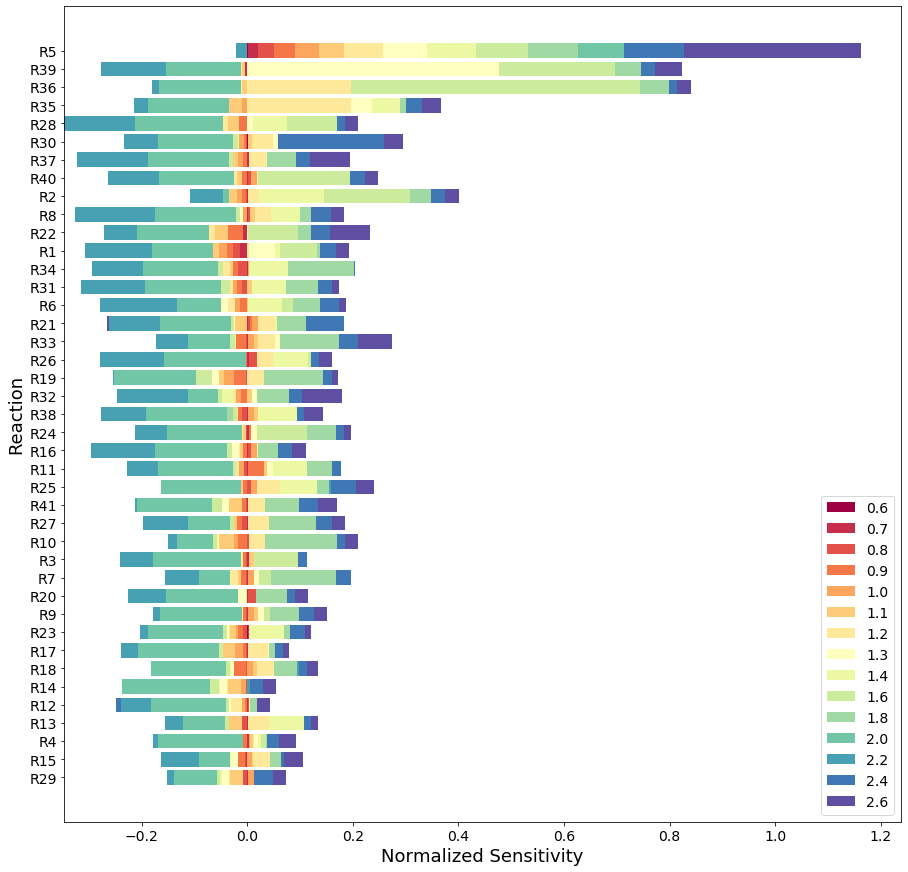

In [580]:
allPlot(normalized_sens_data, 'CH4 Conversion')

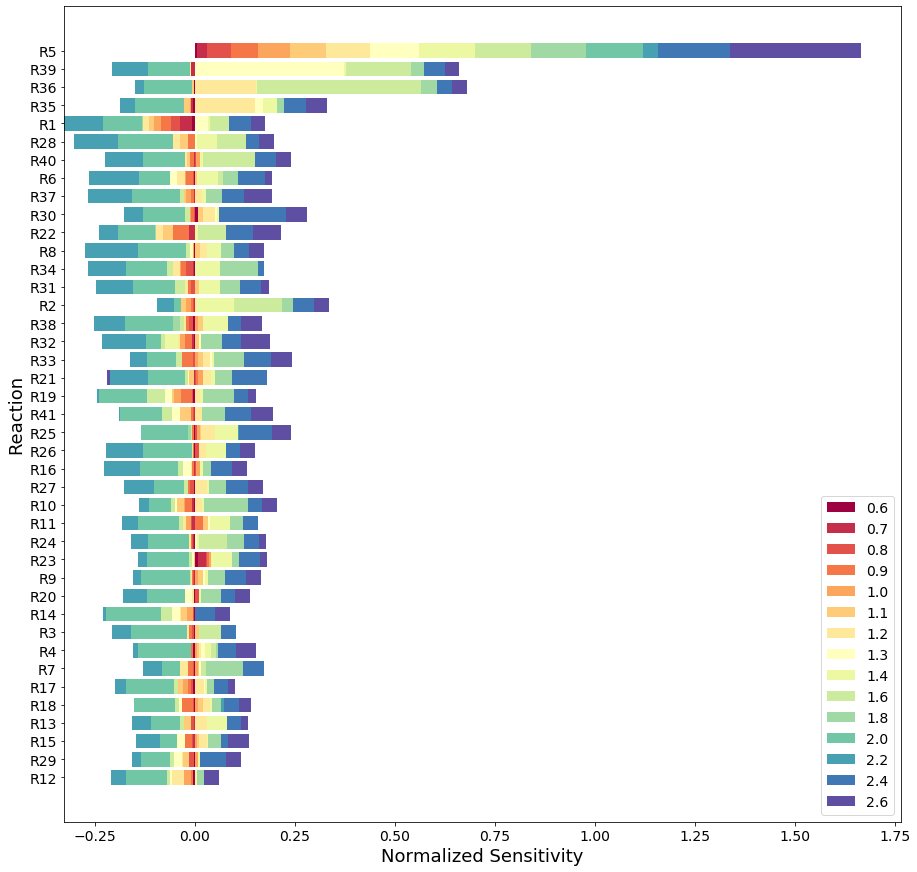

In [581]:
allPlot(normalized_sens_data, 'SynGas Yield')